<a href="https://colab.research.google.com/github/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/GCDAI_INSAID_JAN20/Term7/sanketpadwal_gmail_com_DeepLearningFoundationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID Term Project - Deap Learning Foundation
# **PREDICTING LOWEST PRODUCT PRICING USING ARTIFICIAL NUERAL NETWORK**
<img src="https://github.com/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/Term7/60184848bf83e-Summer%20Sale%20Banner%20Templates.png?raw=true" width="1000" height="500" />

##### https://graphicmama.com/design-bundle/summer-sale-banner-templates?utm_source=sale-banners-article&utm_medium=image


# Table of Content
1. [Introduction- Problem Statement](#Section1)<br>
2. [Objective](#Section2)<br>
3. [Install and load libraries](#Section3)<br>
4. [Load Dataset](#Section4)<br>
5. [EDA using pandas data profiling method](#Section5)<br>
6. [Prepare data for model building](#Section6)<br>
7. [Build a basic ANN model](#Section7)<br>
8. [Use of Optimization - Random Search](#Section8)<br>
9. [Best Model parameters Identification](#Section9)<br>
10. [Test Data evaluation with Best Model](#Section10)<br>
11. [Conclusion](#Section11)<br>

<a name = Section1></a>
### **1. Introduction- Problem Statement**
---
##### A leading global leader of e-commerce has over 150 million paid subscription users. One of the many perks of the subscription is the privilege of buying products at lower prices. For an upcoming sale, the organization has decided to promote local artisans and their products, to help them through these tough times. However, slashed prices may impact local artists. To not let discounts affect local artists, the company has decided to determine the lowest price at which a particular good can be sold.
---

### **Dataset:**
The dataset consists of various parameters such as a unique item ID, category of the market to which a product belongs, category and quality of the product, its demand rate, and its original market price. The data is present in a single csv file: slashing_prices.csv - Dataset consisting of approximately 9,798 data samples.

**Source:**<br> 
Github <br> https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Term7/slashing_prices.csv?_sm_au_=iVVH3LNLF2QNrsFqL321jK0f1JH33


**Data Descriptions:** 

| Column Name           | Description |
|-----------------------|-------------|
| Item_Id Unique        | item ID. |
| Date                  | Date.
| StateofCountry        | State no. of the country.
| Market_Category       | Category of the market to which the product belongs to. |
| Product_Category      | Category of the product.
| Grade                 | Quality of the product.
| Demand                |Demand rate of the product in the market.
|LowCapPrice            |Lowest price that can be offered. [target]
| HighCapPrice          |Original maximum price in the current market.

<a name = Section2></a>
### **2. Objective**
---
Task is to build a predictive model using Artificial Neural Net algorithm that helps to set up a lowest-pricing model for the products in dataset.

<a name = Section3></a>
### **3. Install and load libraries** 

In [60]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from time import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s :%(message)s', level=logging.INFO)
pd.options.mode.chained_assignment = None # to avoid unnecessary warnings

In [61]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

# to visualize all columns  in the dataframe
pd.pandas.set_option('display.max_columns',None)

2021-06-15 15:36:32,544 : INFO :test


<a name = Section4></a>
### **4. Load Dataset** 

In [62]:
# Importing Data
data  = pd.read_csv("https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Term7/slashing_prices.csv?_sm_au_=iVVH3LNLF2QNrsFqL321jK0f1JH33")
data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [63]:
# check size of the data
data.shape

(9798, 9)

In [64]:
# dataset columns
data.columns

Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price'],
      dtype='object')

In [6]:
# Data Type informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [7]:
# check for null values in the dataset
data.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [8]:
# Describe numerical columns in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
State_of_Country,9798.0,14.278730,8.760964,0.0,3.00,20.0,21.000,23.0
Market_Category,9798.0,198.414064,169.767862,0.0,55.00,129.0,389.000,471.0
Product_Category,9798.0,2.492958,4.751807,0.0,0.00,0.0,1.000,17.0
Grade,9798.0,0.652072,1.032439,0.0,0.00,0.0,2.000,3.0
Demand,9798.0,71.977414,927.194052,0.0,0.50,2.0,10.175,64160.5
Low_Cap_Price,9798.0,3500.273525,2188.046803,1.0,1863.25,3124.0,4667.500,17580.0
High_Cap_Price,9798.0,6349.838028,3652.780956,163.0,3878.25,5552.5,7993.750,58812.0


In [9]:
# Change data type of 'Date' column to date time
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Check for data skewness values; accepted range +/-1
data.skew()

State_of_Country    -0.780606
Market_Category      0.472158
Product_Category     1.545304
Grade                1.180747
Demand              43.790193
Low_Cap_Price        1.176712
High_Cap_Price       1.638512
dtype: float64

In [11]:
# Check for data kurtosis values; accepted range +/-5
data.kurtosis()

State_of_Country      -1.249516
Market_Category       -1.405859
Product_Category       0.659208
Grade                 -0.190754
Demand              2575.808373
Low_Cap_Price          2.255325
High_Cap_Price         6.884555
dtype: float64

In [12]:
# mean values for High_Cap_Price and Low_Cap_Price
print("Average High Cap Price = ",data.High_Cap_Price.mean())
print("Average Low Cap Price = ",data.Low_Cap_Price.mean())

Average High Cap Price =  6349.838028169014
Average Low Cap Price =  3500.2735252092266


<a name = Section5></a>
### **5. EDA using pandas data profiling method** 

In [13]:
# !pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install -U pandas-profiling

# import pandas_profiling as pp
# from pandas_profiling import ProfileReport'

# Kernal restart is needed after this step

In [14]:
# import pandas_profiling
# from pandas_profiling import ProfileReport

In [15]:
# profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
# profile.to_file(output_file="sales_data_profile.html")

**Pandas Profiling outcome:**
1. Year information can be extracted from ‘Date’ column to understand data patterns between years.
2. Product ID column has high cardinality of data and can be dropped.
3. ‘Demand’ column shows skewed values on a distribution curve and requires adjustment. (acceptance +/-1)
4. ‘High_Cap_Price’ column shows high kurtosis value on a distribution curve and requires adjustment. (acceptance +/-5)
5. ‘State_of_Country’, ‘Market_category’, ‘Product_Category’, ‘Grade’ columns to be treated as categorical columns and requires one-hot-encoded.
6. Skewness and Kurtosis of target variable (Low_Cap_Price) is close to acceptance range and will not make any changes.
7. Remove outlier entries from 'Demand' and 'High_Cap_Price' columns. Values over 30000 are excluded.

In [16]:
# Excluding outlier from 'Demand' column
data = data[data['Demand']<=30000]

2021-06-15 13:09:43,167 : INFO :NumExpr defaulting to 2 threads.


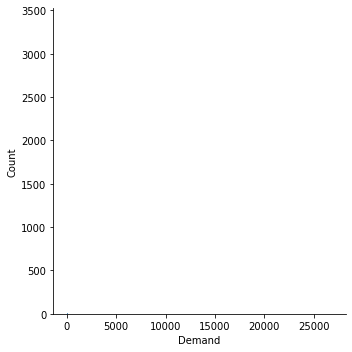

In [17]:
df  = data[data['Demand']<=30000]
sns.displot(df, x="Demand")

In [18]:
# Excluding outlier from 'High_Cap_Price' column
data = data[data['High_Cap_Price']<=30000]

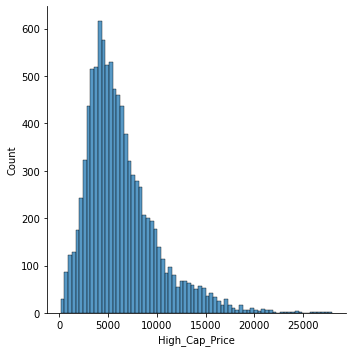

In [19]:
df  = data[data['High_Cap_Price']<=30000]
sns.displot(df, x="High_Cap_Price")

In [20]:
# Extract year information from 'Date' column and drop 'Date' columns
data['year'] = data['Date'].dt.year
data = data.drop(columns='Date',axis=0)

# Drop 'Item_Id' column
data = data.drop(columns='Item_Id', axis=0)

# Take log of 'Demand' and 'High_Cap_Price' columns to Normalize distribution in respective columns
data['Demand']=np.log1p(data.Demand)
data['High_Cap_Price']=np.log1p(data.High_Cap_Price)


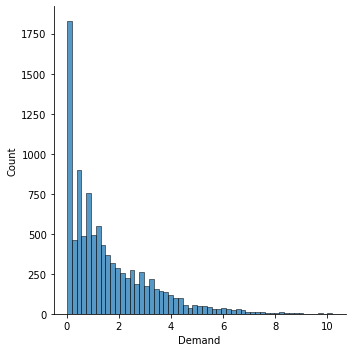

In [21]:
sns.displot(data, x="Demand")

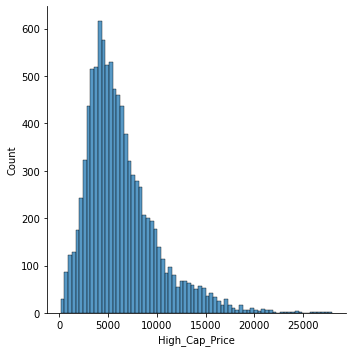

In [22]:
sns.displot(df, x="High_Cap_Price")

<a name = Section6></a>
### **6. Prepare data for model building** 

**One hot encoding of categorical columns**

In [23]:
# one hot encode categorical columns
data = pd.get_dummies(data,columns=['State_of_Country','Market_Category','Product_Category','Grade','year'])

**Split data into train-test datasets**

In [24]:
# Split data into 80%-20% train-test ratio 
train_data = data.sample(frac=0.8,random_state=np.random.RandomState())
test_data = data.drop(train_data.index)

**Normalise Train and Test data**

In [25]:
# Normalize 'Demand' and 'High_Cap_Price' columns for test and train dataset

train_data['Demand'] = (train_data['Demand'] - np.mean(train_data['Demand']))/(np.max(train_data['Demand'])-np.min(train_data['Demand']))
train_data['High_Cap_Price'] = (train_data['High_Cap_Price']-np.mean(train_data['High_Cap_Price']))/(np.max(train_data['High_Cap_Price'])-np.min(train_data['High_Cap_Price']))

test_data['Demand'] = (test_data['Demand'] - np.mean(test_data['Demand']))/(np.max(test_data['Demand'])-np.min(test_data['Demand']))
test_data['High_Cap_Price'] = (test_data['High_Cap_Price'] - np.mean(test_data['High_Cap_Price']))/(np.max(test_data['High_Cap_Price'])-np.min(test_data['High_Cap_Price']))

**Split X and y**

In [26]:
# extact target variable from feature columns

train_X = train_data.drop(columns='Low_Cap_Price',axis=0)
test_X = test_data.drop(columns='Low_Cap_Price',axis=0)

train_y = train_data.pop('Low_Cap_Price')
test_y = test_data.pop('Low_Cap_Price')

<a name = Section7></a>
### **7. Build a basic ANN model** 

In [27]:
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 9.7MB/s 


In [28]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
print(tf.__version__)

2.5.0


In [29]:
# Build a base model with 3 dense layers

def build_model():
  model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=[len(train_X.keys())]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(32, activation='relu'),
                            layers.Dense(1)])

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)

  # Compiling the model
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return model

In [30]:
# Build and review model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               41472     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 51,841
Trainable params: 51,841
Non-trainable params: 0
_________________________________________________________________


*Now try out the model. Taking a batch of 10 examples from training data and call model.predict on it*

In [31]:
# Sample test
example_batch = train_X[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.07247859],
       [-0.01978023],
       [-0.15672913],
       [-0.09180939],
       [ 0.00877832],
       [-0.11050667],
       [-0.07578295],
       [-0.02712341],
       [-0.05310708],
       [-0.07587413]], dtype=float32)

**Train model**<br>
Train the model for 500 epochs, and record the training and validation accuracy in the history object. We will use early stopping callback that tests a training condition for every epoch. if a set amount of apochs elapses without showing improvement then the training is stopped automatically.

In [32]:
Epochs = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

history = model.fit(train_X, train_y, epochs=Epochs, validation_split=0.2,
                    verbose=0, callbacks=[early_stop,tfdocs.modeling.EpochDots()])

print("\n Using early stopping, only", len(history.history['val_loss']),"epoch are run")



Epoch: 0, loss:11229127.0000,  mae:2622.1680,  mse:11229127.0000,  val_loss:3925994.5000,  val_mae:1444.4833,  val_mse:3925994.5000,  
..............................................................................................
 Using early stopping, only 94 epoch are run


Visualize the model's training progress using the stats stored in the history object

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,11229127.00,2622.167969,11229127.00,3925994.50,1444.483276,3925994.50,0
1,2796391.00,1212.902832,2796391.00,2596238.25,1090.974609,2596238.25,1
2,1958709.25,977.628723,1958709.25,2045203.25,961.916199,2045203.25,2
3,1551115.50,863.575684,1551115.50,1720490.75,867.846863,1720490.75,3
4,1316568.25,787.580322,1316568.25,1517516.75,806.112976,1517516.75,4


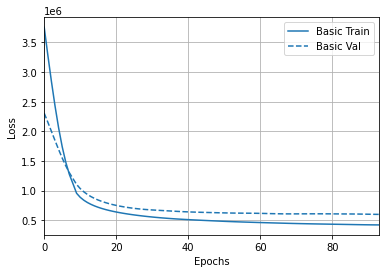

In [34]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric="loss")

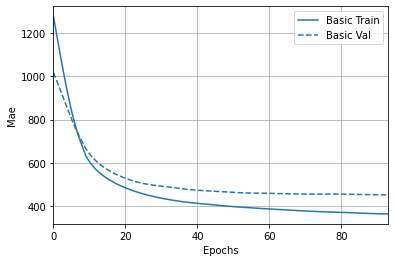

In [35]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric="mae")

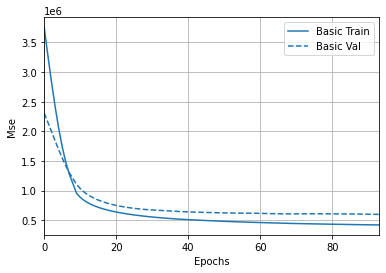

In [36]:
plotter.plot({'Basic': history}, metric="mse")

In [37]:
loss, mae, mse = model.evaluate(test_X,test_y,verbose=2)
print("Test-set Mean absolute error: {:5.2f}".format(mae))

62/62 - 0s - loss: 696317.8750 - mae: 479.9268 - mse: 696317.8750
Test-set Mean absolute error: 479.93


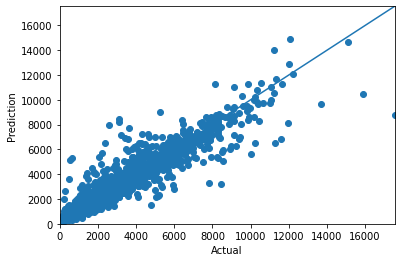

In [38]:
y_pred_test = model.predict(test_X).flatten()

plt.scatter(test_y,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Prediction')

lims = [0,max(test_y)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

It appears that model is predicting reasonably well.

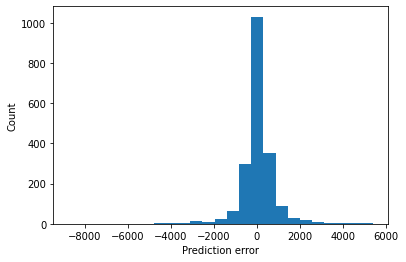

In [39]:
# Error Distribution

error = y_pred_test-test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction error')
_ = plt.ylabel('Count')

Error distribution appears to be Gaussian

In [40]:
y_pred_train = model.predict(train_X).flatten()

In [41]:
print("Accuracy obtained using train_X and x_val sets from the original x!")
print("Training accuracy: ",r2_score(train_y, y_pred_train))
print("Test accuracy: ",r2_score(test_y, y_pred_test))
print("Test mean-squared error: ",np.sqrt(mean_squared_error(test_y, y_pred_test)))

Accuracy obtained using train_X and x_val sets from the original x!
Training accuracy:  0.9060205245805296
Test accuracy:  0.8593301790488188
Test mean-squared error:  834.4566404836867


<a name = Section8></a>
### **8. Use of Optimization - Random Search**
Random search worked well for this dataset compare to Bayesian optimization

In [42]:
# Install keras-tuner
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=64a60c1e1bc15422a0f5ea95ecb68ae775c9abe27608a290c74e09cf526dd1b6
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=a36c5cc8dc349a952b54b8e7c920b682417d56f42fe1df06e2a41b5006e37a0e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [43]:
# Import libraries
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras

In [44]:
from kerastuner import HyperModel as hp
from keras.layers import Dense, BatchNormalization,Dropout
from kerastuner import RandomSearch, Hyperband, BayesianOptimization
from keras import layers
from keras.layers import Dense
#from keras.models import Sequential
from tensorflow.keras.models import Sequential

**Defining the model for hypertuning**

In [45]:
 #for activation function - hp.Choice('activation', ['relu','sigmoid','tanh']) relu worked better when tested- took almost= 100mins to ruh the experiment

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers1', 2, 4)):
        model.add(layers.Dense(units=hp.Int('units_1' + str(i), min_value=16, max_value=128, step=16),input_shape=[len(train_X.keys())],activation='relu'))
        model.add(layers.Dense(units=hp.Int('units_2' + str(i), min_value=10, max_value=50, step=10), activation='relu'))
        #model.add(layers.Dense(units=hp.Int('units_3' + str(i), min_value=8, max_value=32, step=8), activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(rate=hp.Float('drop_rate', min_value=0.1, max_value=0.8, step=0.1)))
    for i in range(hp.Int('num_layers2', 2, 3)):
        model.add(layers.Dense(units=hp.Int('units_4' + str(i), min_value=16, max_value=128, step=16), activation='relu'))
        #model.add(layers.Dense(units=hp.Int('units_5' + str(i), min_value=8, max_value=32, step=8), activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='mse', metrics=['mae','mse'])
    return model

This is the same model we built earlier as base model, except that for every hyperparameter, we defined a search space. You may have noticed hp.Int, hp.Float, and hp.Choice, these are used to define a search space for a hyperparameter that accepts an integer, float and a category respectively. ‘hp’ is an alias for Keras Tuner’s HyperParameters class.

In [46]:
# Random Search tuner used

MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner_rs= RandomSearch(build_model, objective='val_mae', max_trials=MAX_TRIALS, seed=42,
            executions_per_trial=EXECUTION_PER_TRIAL, directory= 'random_search',
            project_name='low_prices', overwrite=True)

'MAX_TRIALS' variable represents the number of hyperparameter combinations that will be tested by the tuner, while the 'EXECUTION_PER_TRIAL' variable is the number of models that should be built and fit for each trial for robustness purposes.

In [47]:
# Once the model and the tuner are set up, a summary of the task is easily available:
# tuner_rs.search_space_summary()

Before running the hyperparameter search, define a callback to clear the training outputs at the end of every training step.

In [48]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

<a name = Section9></a>
### **9. Best Model parameters Identification**
Run the hyperparameter search.
The arguments for the search method are the same as those used for tf.keras.model.fit in addition to the callback above.

In [50]:
print('searching for the best params!')
N_EPOCH_SEARCH=50

t1= time()
tuner_rs.search(x= train_X,
             y= train_y,
             epochs=N_EPOCH_SEARCH,
             batch_size= 100,
             validation_split = 0.2,
             verbose=1
            )
print(time()- t1," secs")

# Retreive the optimal hyperparameters
best_hps_rs= tuner_rs.get_best_hyperparameters(num_trials=1)[0]
# Retrieve the best model
best_model_rs = tuner_rs.get_best_models(num_models=1)[0]

2021-06-15 13:35:31,493 : INFO :Oracle triggered exit


Trial 20 Complete [00h 01m 29s]
val_mae: 2216.7642822265625

Best val_mae So Far: 460.28338623046875
Total elapsed time: 00h 22m 55s
1375.2259273529053  secs


In [51]:
print(best_hps_rs.get('num_layers1'))
print(best_hps_rs.get('num_layers2'))
print(best_hps_rs.get('drop_rate'))
print(best_hps_rs.get('learning_rate'))

2
3
0.2
0.01


Retrain the model with the optimal hyper parameters from the search

In [52]:
models = tuner_rs.get_best_models(num_models=3)

In [53]:
models[0].evaluate(train_X, train_y)

245/245 [==============================] - 1s 2ms/step - loss: 449663.3125 - mae: 396.4717 - mse: 449663.3125


[449663.3125, 396.4717102050781, 449663.3125]

In [54]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 64)                20736     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 40)                2600      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 40)                160       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 40)                0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 16)                656       
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 30)                510       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 30)                1

<a name = Section10></a>
### **10. Test Data evaluation with Best Model**

In [55]:
# Retreive the optimal hyperparameters
best_hps= tuner_rs.get_best_hyperparameters(num_trials=1)[0]
# Retrieve the best model
best_model = tuner_rs.get_best_models(num_models=1)[0]

In [56]:
# Evaluate the best model.
print(best_model.metrics_names)
loss, mae, mse = best_model.evaluate(test_X, test_y)
print(f'loss:{loss} mae: {mae} mse: {mse}')

[]
62/62 [==============================] - 1s 2ms/step - loss: 684564.1250 - mae: 484.8443 - mse: 684564.1250
loss:684564.125 mae: 484.8442687988281 mse: 684564.125


In [57]:
# Build the model with the optimal hyperparameters and train it on the data
tuned_model = tuner_rs.hypermodel.build(best_hps)

t00= time()
history_tuned= tuned_model.fit(train_X, train_y, 
          epochs = 100, 
          validation_data = (test_X, test_y),
          verbose=1,
          callbacks= early_stop)

print(time()- t00," secs")

print("\n Using Early stopping, needed only ",len(history_tuned.history['val_mae']),"epochs to converge!")

Epoch 1/100
245/245 [==============================] - 3s 6ms/step - loss: 14309984.0000 - mae: 3247.8350 - mse: 14309984.0000 - val_loss: 10017049.0000 - val_mae: 2964.5388 - val_mse: 10017049.0000
Epoch 2/100
245/245 [==============================] - 1s 5ms/step - loss: 5049913.5000 - mae: 1907.0216 - mse: 5049913.5000 - val_loss: 7728645.5000 - val_mae: 2462.7546 - val_mse: 7728645.5000
Epoch 3/100
245/245 [==============================] - 1s 4ms/step - loss: 1381669.8750 - mae: 839.3425 - mse: 1381669.8750 - val_loss: 896534.8125 - val_mae: 592.6625 - val_mse: 896534.8125
Epoch 4/100
245/245 [==============================] - 1s 4ms/step - loss: 1027678.8125 - mae: 685.9868 - mse: 1027678.8125 - val_loss: 830470.6875 - val_mae: 573.6605 - val_mse: 830470.6875
Epoch 5/100
245/245 [==============================] - 1s 5ms/step - loss: 1005445.6250 - mae: 684.8395 - mse: 1005445.6250 - val_loss: 759047.3750 - val_mae: 538.8746 - val_mse: 759047.3750
Epoch 6/100
245/245 [============

In [58]:
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 64)                20736     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 40)                2600      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 40)                160       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 40)                0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 16)                656       
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 30)                510       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 30)                1

In [59]:
y_pred_train_tuned= tuned_model.predict(train_X).flatten()
y_pred_test_tuned= tuned_model.predict(test_X).flatten()

print("Training accuracy: ",r2_score(train_y, y_pred_train_tuned))

print("Test accuracy: ",r2_score(test_y, y_pred_test_tuned))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(test_y, y_pred_test_tuned)))

Training accuracy:  0.8976291708042548
Test accuracy:  0.8608422158783218
Test mean-squared error:  829.9598051286465


<a name = Section11></a>
### **11. Conclusion**

The model accuracy is about 86% against the training accuracy of 89%.
Random Search tuner worked better for this dataset compared to Bayesian Optimization.